### Castlecraig

In [302]:
import ipywidgets as widgets
import pandas as pd
import sys
path = r'C:\BW\RTD\repos-hadley\brightwind'
if path not in sys.path:
    sys.path.insert(1, path)
from analyse import correlation as bw
from load import reanalysis
from plot import plot
from transform import transform

import importlib
importlib.reload(bw)
importlib.reload(reanalysis)
importlib.reload(plot)
importlib.reload(transform)

<module 'transform.transform' from 'C:\\BW\\RTD\\repos-hadley\\brightwind\\transform\\transform.py'>

In [7]:
merra2_dfs_1996 = reanalysis.get_merra2_nearest_nodes('55.5','-8.5', from_date='1996-01-01', to_date='2016-12-31')

2018-09-07 09:26:44.785952 - Run start for get_merra_2_dataframe.
2018-09-07 09:26:44.785952 - http://52.16.60.214:3306/merra/55.5/-8.75/1996-01-01/2016-12-31
2018-09-07 09:26:55.976074 - Finished
2018-09-07 09:26:55.976074 - Run start for get_merra_2_dataframe.
2018-09-07 09:26:55.976074 - http://52.16.60.214:3306/merra/55.5/-8.125/1996-01-01/2016-12-31
2018-09-07 09:27:06.378920 - Finished
2018-09-07 09:27:06.382129 - Run start for get_merra_2_dataframe.
2018-09-07 09:27:06.382129 - http://52.16.60.214:3306/merra/55.0/-8.125/1996-01-01/2016-12-31
2018-09-07 09:27:16.631337 - Finished
2018-09-07 09:27:16.646959 - Run start for get_merra_2_dataframe.
2018-09-07 09:27:16.646959 - http://52.16.60.214:3306/merra/55.0/-8.75/1996-01-01/2016-12-31
2018-09-07 09:27:27.024563 - Finished


In [8]:
import pickle
with open ('merra2_dfs_castlecraig_1996.pkl','wb') as file:
    pickle.dump(merra2_dfs_1996,file)
    

In [75]:
merra2_dfs[0].data.to_csv('Castlecraig_MERRA2_correlations_test.csv')

In [2]:
import pickle
merra2_dfs = pickle.load(open('merra2_dfs_castlecraig_1996.pkl','rb'))

In [3]:
site_file_path = r'C:\Dropbox (brightwind)\RTD\BrightData\MERA\2018-05-25_MERA-LT-reference-quality\site-data\M352_Calib_Cleaned_20jan2011onwards.csv'

if site_file_path.endswith('.csv'):
    site_data = pd.read_csv(site_file_path)
else:
    site_data = pd.read_excel(site_file_path)
index_wdgt = widgets.Dropdown(
    options=site_data.columns,
    description='Index column:',style = {'description_width': 'initial'},
    disabled=False
)
print("Choose index column:")
index_wdgt




Choose index column:


A Jupyter Widget

In [4]:

site_data = site_data.set_index(pd.DatetimeIndex(site_data[index_wdgt.value]))


In [5]:
target_wdgt = widgets.Dropdown(options=site_data.columns, description='Target:', style = {'description_width': 'initial'},disabled=False)
ref_merra2_wdgt = widgets.Dropdown(options=merra2_dfs[0].data.columns, description='MERRA2:',style = {'description_width': 'initial'}, disabled=False)
items = [target_wdgt, ref_merra2_wdgt]
box_layout = widgets.Layout(display='flex', flex_flow='row', align_items='stretch')
box = widgets.Box(children=items, layout=box_layout)
box


A Jupyter Widget

In [51]:
merra2_dfs[1].data.resample('10D', axis=0, closed='left', label='left',base=0,
                                convention='start', kind='timestamp').count().divide(transform._max_coverage_count(merra2_dfs[1].data.index, merra2_dfs[1].data.resample('10D', axis=0, closed='left', label='left',base=0,
                                convention='start', kind='timestamp').mean().index), axis=0)

,PS_hPa,T2M_degC,WD50m_deg,WS50m_ms
DateTime,,,,
1996-01-01,1.0,1.0,1.0,1.0
1996-01-11,1.0,1.0,1.0,1.0
1996-01-21,1.0,1.0,1.0,1.0
1996-01-31,1.0,1.0,1.0,1.0
1996-02-10,1.0,1.0,1.0,1.0
1996-02-20,1.0,1.0,1.0,1.0
1996-03-01,1.0,1.0,1.0,1.0
1996-03-11,1.0,1.0,1.0,1.0
1996-03-21,1.0,1.0,1.0,1.0


In [50]:
transform._max_coverage_count(merra2_dfs[1].data.index, merra2_dfs[1].data.resample('10D', axis=0, closed='left', label='left',base=0,
                                convention='start', kind='timestamp').mean().index)

DatetimeIndex(['1996-01-01', '1996-01-11', '1996-01-21', '1996-01-31',
               '1996-02-10', '1996-02-20', '1996-03-01', '1996-03-11',
               '1996-03-21', '1996-03-31',
               ...
               '2016-09-22', '2016-10-02', '2016-10-12', '2016-10-22',
               '2016-11-01', '2016-11-11', '2016-11-21', '2016-12-01',
               '2016-12-11', '2016-12-21'],
              dtype='datetime64[ns]', name='DateTime', length=767, freq='10D')

In [40]:
transform.get_coverage(merra2_dfs[1].data)

,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,...,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,PS_hPa,T2M_degC,WD50m_deg,WS50m_ms
DateTime,,,,,,,,,,,,,,,,,,,,,
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
transform._get_data_resolution(merra2_dfs[1].data.index) < transform._get_data_resolution(site_data.index)

False

In [66]:
transform.average_data_by_period(merra2_dfs[1].data[ref_merra2_wdgt.value], period='10D', filter=True, return_coverage=True)[1]


DateTime
1996-01-01    1.0
1996-01-11    1.0
1996-01-21    1.0
1996-01-31    1.0
1996-02-10    1.0
1996-02-20    1.0
1996-03-01    1.0
1996-03-11    1.0
1996-03-21    1.0
1996-03-31    1.0
1996-04-10    1.0
1996-04-20    1.0
1996-04-30    1.0
1996-05-10    1.0
1996-05-20    1.0
1996-05-30    1.0
1996-06-09    1.0
1996-06-19    1.0
1996-06-29    1.0
1996-07-09    1.0
1996-07-19    1.0
1996-07-29    1.0
1996-08-08    1.0
1996-08-18    1.0
1996-08-28    1.0
1996-09-07    1.0
1996-09-17    1.0
1996-09-27    1.0
1996-10-07    1.0
1996-10-17    1.0
             ... 
2016-03-06    1.0
2016-03-16    1.0
2016-03-26    1.0
2016-04-05    1.0
2016-04-15    1.0
2016-04-25    1.0
2016-05-05    1.0
2016-05-15    1.0
2016-05-25    1.0
2016-06-04    1.0
2016-06-14    1.0
2016-06-24    1.0
2016-07-04    1.0
2016-07-14    1.0
2016-07-24    1.0
2016-08-03    1.0
2016-08-13    1.0
2016-08-23    1.0
2016-09-02    1.0
2016-09-12    1.0
2016-09-22    1.0
2016-10-02    1.0
2016-10-12    1.0
2016-10-22    1.0
2

In [287]:
from sklearn.linear_model import LinearRegression
combined = LinearRegression()
# combined_data = pd.concat([valentia['wdsp'][overlap_idx],merra2['WS50m_m/s'][overlap_idx]], axis=1)
# combined.fit(combined_data, hourly_site_data['WS5_ms_Avg'][overlap_idx].values.reshape(-1,1))

x, y = bw._preprocess_data_for_correlations(pd.concat([merra2_dfs[i].data[ref_merra2_wdgt.value] for i in range(0,4)],axis=1,join='inner'), 
                 site_data[target_wdgt.value], averaging_prd='1H', coverage_threshold=0.8)
combined.fit(mlr.data.iloc[:,:len(mlr.data.columns)-1], mlr.data.iloc[:,-1])
combined.coef_, combined.intercept_

(array([-0.0813603 , -0.17854418,  1.31509098, -0.23565439]),
 1.3117160988494376)

In [303]:
mlr = bw.MultipleLinearRegression(ref=[merra2_dfs[i].data[ref_merra2_wdgt.value] for i in range(0,4)],target=site_data[target_wdgt.value], averaging_prd='1H', 
                                  coverage_threshold=0.8)

In [304]:
mlr.run()

In [305]:
mlr.params

{'offset': 1.3117160988494521,
 'slope': array([-0.0813603 , -0.17854418,  1.31509098, -0.23565439])}

In [306]:
mlr.data

,ref_spd_1,ref_spd_2,ref_spd_3,ref_spd_4,target_spd
2011-01-20 09:00:00,5.883,5.506,4.386,5.090,5.368333
2011-01-20 10:00:00,5.956,5.502,4.276,5.104,5.158333
2011-01-20 11:00:00,6.246,5.631,4.297,5.285,5.115000
2011-01-20 12:00:00,6.612,5.865,4.424,5.554,5.998333
2011-01-20 13:00:00,6.872,6.060,4.550,5.757,5.250000
2011-01-20 14:00:00,6.927,6.099,4.537,5.763,3.505000
2011-01-20 15:00:00,6.873,6.068,4.416,5.613,3.178333
2011-01-20 16:00:00,6.765,6.028,4.358,5.497,4.206667
2011-01-20 17:00:00,6.672,5.977,4.439,5.520,4.980000
2011-01-20 18:00:00,6.550,5.863,4.492,5.513,4.128333


In [307]:
mlr.synthesize()

1996-01-01 00:00:00    10.786788
1996-01-01 01:00:00    10.314553
1996-01-01 02:00:00    10.173168
1996-01-01 03:00:00     9.756164
1996-01-01 04:00:00     9.593828
1996-01-01 05:00:00     9.975427
1996-01-01 06:00:00     9.610730
1996-01-01 07:00:00     9.403509
1996-01-01 08:00:00     9.378400
1996-01-01 09:00:00     9.328809
1996-01-01 10:00:00     9.219646
1996-01-01 11:00:00     9.042950
1996-01-01 12:00:00     8.636226
1996-01-01 13:00:00     8.241108
1996-01-01 14:00:00     8.074203
1996-01-01 15:00:00     8.166895
1996-01-01 16:00:00     8.060465
1996-01-01 17:00:00     7.884909
1996-01-01 18:00:00     7.775125
1996-01-01 19:00:00     7.704580
1996-01-01 20:00:00     7.662440
1996-01-01 21:00:00     7.567080
1996-01-01 22:00:00     7.539512
1996-01-01 23:00:00     7.298382
1996-01-02 00:00:00     7.150031
1996-01-02 01:00:00     7.024435
1996-01-02 02:00:00     7.064542
1996-01-02 03:00:00     7.248798
1996-01-02 04:00:00     7.398593
1996-01-02 05:00:00     7.501256
          

In [188]:
ordinary = bw.OrdinaryLeastSquares(merra2_dfs[0].data[ref_merra2_wdgt.value], 
                                  site_data[target_wdgt.value], averaging_prd='1D', 
                                  coverage_threshold=0.8)



In [193]:
sum((ordinary.data['target_spd'] - ordinary.data['ref_spd'])**2)

3477.0883452264575

{'slope': 0.76424017513653641, 'offset': 1.2869551044078436, 'r2': 0.90475689691199157}


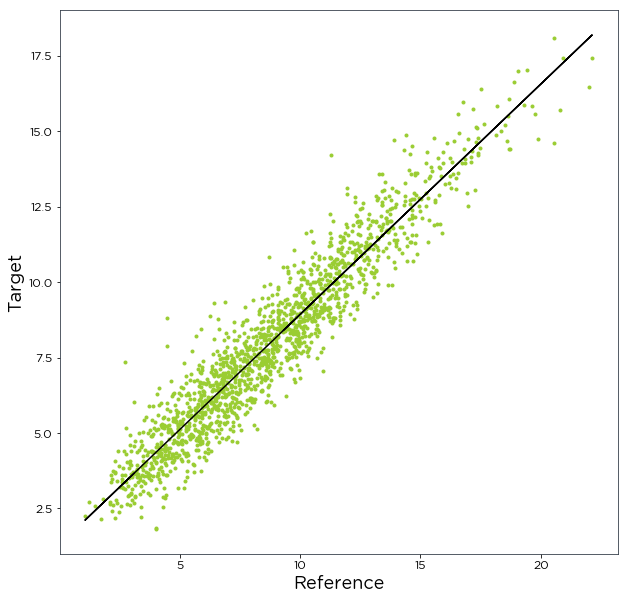

1996-01-01     8.948590
1996-01-02     8.661554
1996-01-03    13.098574
1996-01-04     6.810183
1996-01-05     8.973810
1996-01-06    14.888711
1996-01-07    14.096130
1996-01-08    12.677445
1996-01-09    11.931643
1996-01-10     8.259150
1996-01-11    12.218169
1996-01-12     7.186189
1996-01-13     8.862231
1996-01-14     8.890158
1996-01-15     7.577830
1996-01-16     7.217236
1996-01-17    11.852448
1996-01-18     8.895539
1996-01-19     7.182431
1996-01-20     9.939046
1996-01-21     8.520074
1996-01-22     7.501693
1996-01-23     9.165475
1996-01-24     9.007500
1996-01-25    10.689147
1996-01-26     9.044057
1996-01-27    10.614092
1996-01-28     8.483614
1996-01-29     7.459691
1996-01-30     6.989906
                ...    
2015-05-20     7.633819
2015-05-21     8.998958
2015-05-22     8.083125
2015-05-23     6.037708
2015-05-24     8.020486
2015-05-25     6.013056
2015-05-26     7.278889
2015-05-27     8.191528
2015-05-28     9.129028
2015-05-29     7.594931
2015-05-30     6

In [189]:
ordinary.run()
ordinary.show_params()
ordinary.plot()
ordinary.averaging_prd
ordinary.synthesize()

In [126]:
ordinary

In [98]:
regress = bw.OrthogonalLeastSquares(merra2_dfs[0].data[ref_merra2_wdgt.value], 
                                  site_data[target_wdgt.value], averaging_prd='1D', 
                                  coverage_threshold=0.8)

In [216]:
regress.long_term_ref_speed()

8.6902412103389981

In [22]:
regress.num_data_pts

1609

Beta: [ 0.64407486  1.47482962]
Beta Std Error: [ 0.00720134  0.07880838]
Beta Covariance: [[  4.63980625e-05  -4.65937745e-04]
 [ -4.65937745e-04   5.55671888e-03]]
Residual Variance: 1.1177028860575626
Inverse Condition #: 0.03459057763923457
Reason(s) for Halting:
  Sum of squares convergence
Model output: None
{'slope': 0.64407486013506543, 'offset': 1.4748296182552052, 'r2': 0.81711891398682301}


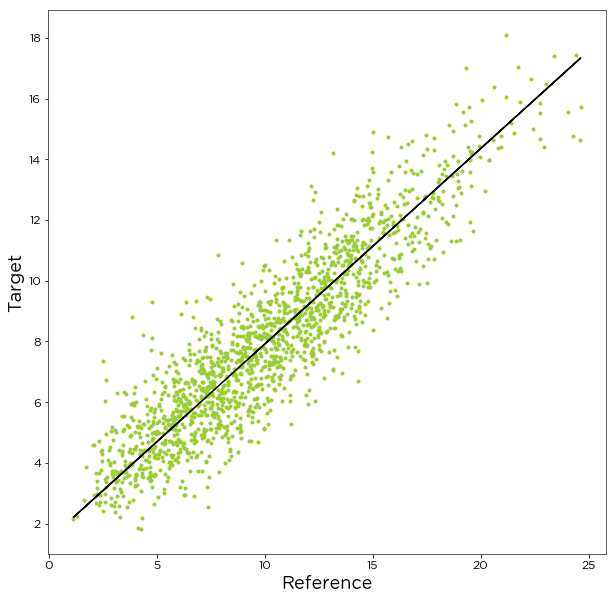

1996-01-01     9.333616
1996-01-02     9.054866
1996-01-03    12.284311
1996-01-04     5.821154
1996-01-05     8.992176
1996-01-06    14.415367
1996-01-07    14.974129
1996-01-08    12.195966
1996-01-09    12.450563
1996-01-10     9.793486
1996-01-11    12.189605
1996-01-12     6.498265
1996-01-13     8.167465
1996-01-14     7.621665
1996-01-15     7.465021
1996-01-16     7.851493
1996-01-17    12.337635
1996-01-18     9.120776
1996-01-19     7.048305
1996-01-20     9.848581
1996-01-21     8.727891
1996-01-22     7.420499
1996-01-23     8.651434
1996-01-24     8.932063
1996-01-25    10.606469
1996-01-26     9.213953
1996-01-27    11.128143
1996-01-28     8.721477
1996-01-29     7.159569
1996-01-30     7.103749
                ...    
2015-05-21     8.998958
2015-05-22     8.083125
2015-05-23     6.037708
2015-05-24     8.020486
2015-05-25     6.013056
2015-05-26     7.278889
2015-05-27     8.191528
2015-05-28     9.129028
2015-05-29     7.594931
2015-05-30     6.686458
2015-05-31    11

In [101]:
regress.run()
regress.show_params()
regress.plot()
regress.synthesize()


In [74]:
merra2_dfs[0].longitude, merra2_dfs[0].latitude

('-8.125', '55.0')

In [72]:
speed_sort = bw.SpeedSort(ref['WS50m_ms'], ref['WD50m_deg'], site_data['A_Avg1'],
                          site_data['WindDir_AVG'],'1H', 0)

NameError: name 'ref' is not defined

In [212]:
speed_sort.run()
speed_sort.synthesize()

{'Ref_cutoff_for_speed': 4.0, 'Ref_veer_cutoff': 5.177485042292863, 'Target_veer_cutoff': 4.9858107348287, 'Overall_average_veer': 2.1928558734672117}
Processing sector: 1
{'slope': 0.82886143267667023, 'offset': 1.9490861758847409}
Processing sector: 2
{'slope': 0.84971093618543736, 'offset': 1.5164545578398485}
Processing sector: 3
{'slope': 0.97172606339029188, 'offset': -0.080334130128519199}
Processing sector: 4
{'slope': 0.99374704279384074, 'offset': -0.16013396734383889}
Processing sector: 5
{'slope': 0.93477756144975721, 'offset': -0.024926640010193957}
Processing sector: 6
{'slope': 1.0441416987003833, 'offset': -1.2503755025201464}
Processing sector: 7
{'slope': 1.0077451180480734, 'offset': -1.0670993138475238}
Processing sector: 8
{'slope': 0.90950167543588323, 'offset': -0.76100683873290631}
Processing sector: 9
{'slope': 0.86650650662934992, 'offset': -0.053186413884664496}
Processing sector: 10
{'slope': 0.82029081056829745, 'offset': 0.74897802811954595}
Processing sec

,0
2011-01-20 09:00:00,5.368333
2011-01-20 10:00:00,5.158333
2011-01-20 11:00:00,5.115000
2011-01-20 12:00:00,5.998333
2011-01-20 13:00:00,5.250000
2011-01-20 14:00:00,3.505000
2011-01-20 15:00:00,3.178333
2011-01-20 16:00:00,4.206667
2011-01-20 17:00:00,4.980000
2011-01-20 18:00:00,4.128333


In [147]:
speed_sort.show_params()

{'Ref_cutoff_for_speed': 4.0, 'Ref_veer_cutoff': 5.177485042292863, 'Target_veer_cutoff': 4.9858107348287, 'Overall_average_veer': 2.1928558734672117, 1: {'slope': 0.82886143267667023, 'offset': 1.9490861758847409, 'target_cutoff': 4.9733333333333327, 'num_pts_for_speed_fit': 1583, 'num_total_pts': 2008, 'average_veer': -6.685867895545315, 'num_pts_for_veer': 1302}, 2: {'slope': 0.84959435735488953, 'offset': 1.517603639843772, 'target_cutoff': 4.3700000000000001, 'num_pts_for_speed_fit': 1260, 'num_total_pts': 1669, 'average_veer': -6.295823665893272, 'num_pts_for_veer': 862}, 3: {'slope': 0.9716146996240278, 'offset': -0.079344491439719, 'target_cutoff': 3.5833333333333335, 'num_pts_for_speed_fit': 923, 'num_total_pts': 1259, 'average_veer': -2.872072072072072, 'num_pts_for_veer': 555}, 4: {'slope': 0.99374704279384074, 'offset': -0.16013396734383889, 'target_cutoff': 3.8783333333333334, 'num_pts_for_speed_fit': 1198, 'num_total_pts': 1499, 'average_veer': 3.123110151187905, 'num_pts

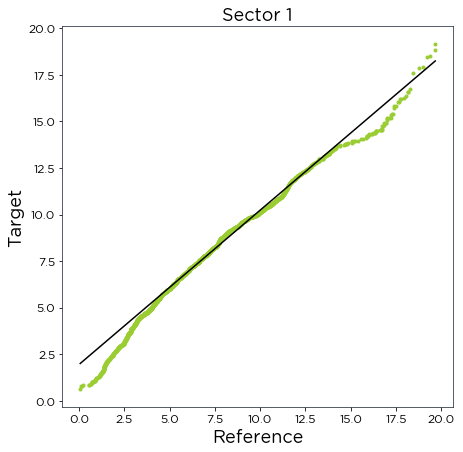

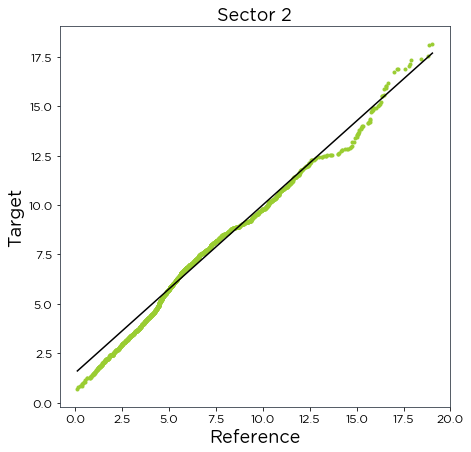

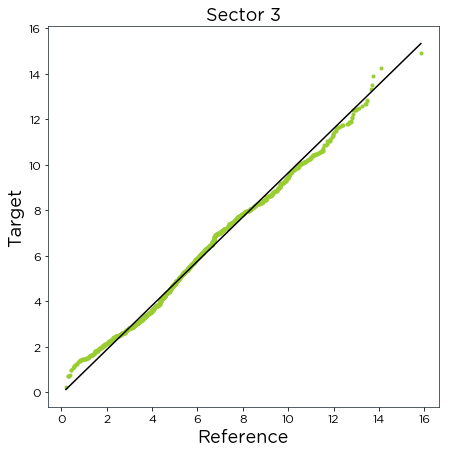

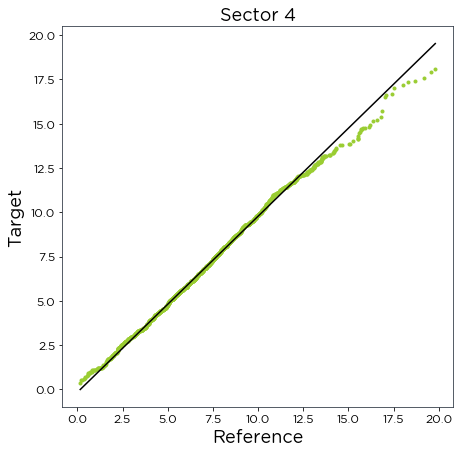

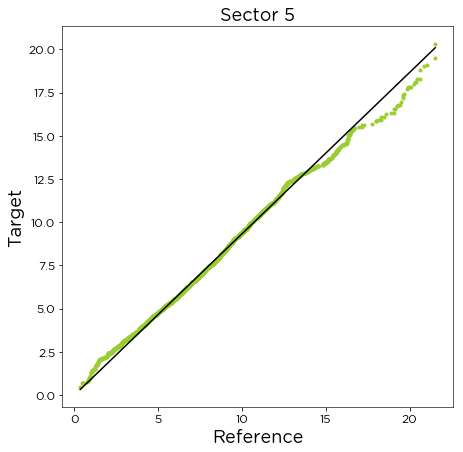

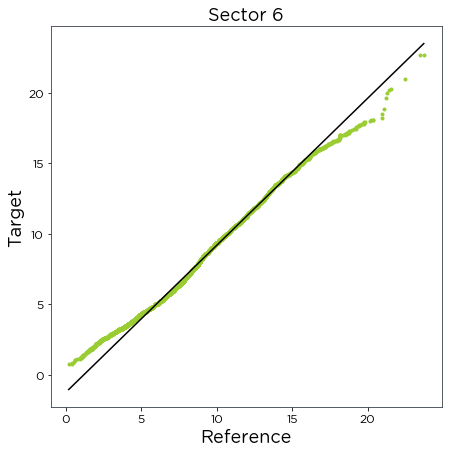

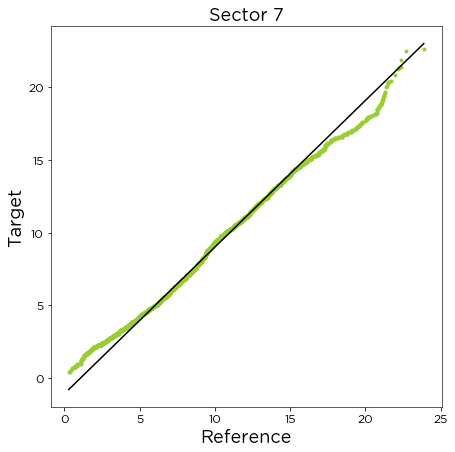

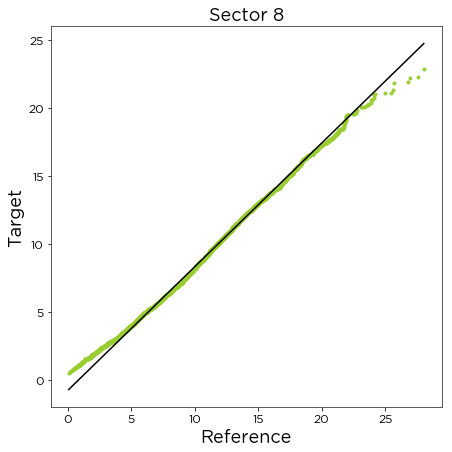

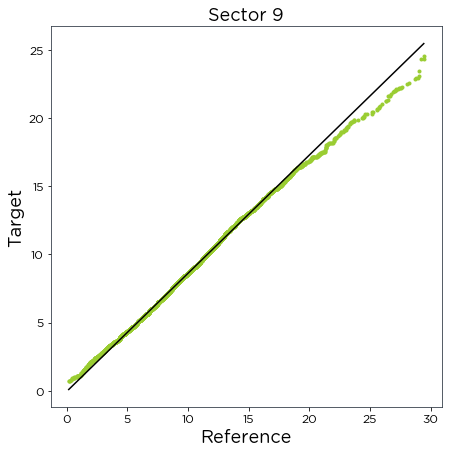

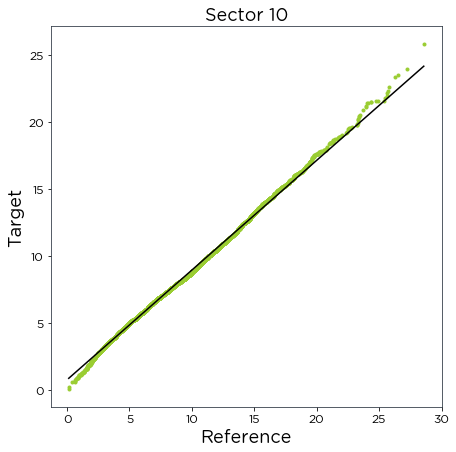

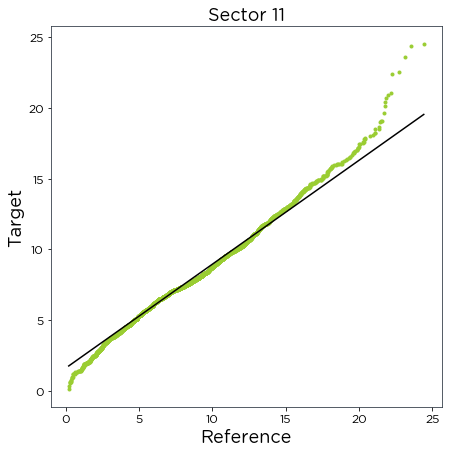

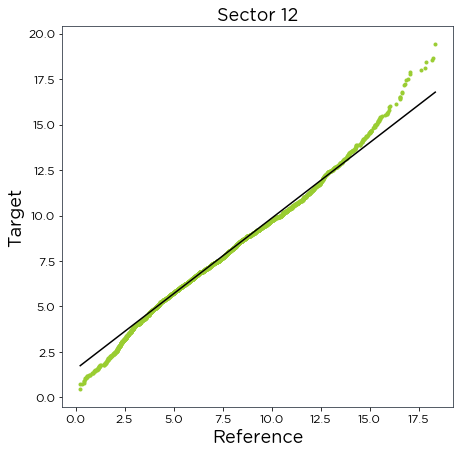

In [148]:
speed_sort.plot()

In [149]:
speed_sort.get_result_table()


,average_veer,num_pts_for_speed_fit,num_pts_for_veer,num_total_pts,offset,slope,target_cutoff
1,-6.685868,1583,1302,2008,1.949086,0.828861,4.973333
2,-6.295824,1260,862,1669,1.517604,0.849594,4.370000
3,-2.872072,923,555,1259,-0.079344,0.971615,3.583333
4,3.123110,1198,926,1499,-0.160134,0.993747,3.878333
5,1.612853,2305,1914,2598,-0.025408,0.934820,3.913333
6,10.046491,2939,2280,3305,-1.249036,1.044026,3.473333
7,12.906561,3571,2911,3949,-1.065116,1.007588,3.428333
8,5.886651,4542,3723,4885,-0.761113,0.909509,3.166667
9,1.705150,5453,4660,5846,-0.055494,0.866676,3.568333
10,-1.415632,5170,4670,5603,0.748978,0.820291,4.083333


In [150]:
speed_sort.overall_veer

2.1928558734672117

In [191]:
result['average_veer'].mean()

1.0249810615590242

In [192]:
sum(result['num_total_pts'])

38653

In [193]:
sum(result['num_pts_for_speed_fit'])

34076

In [194]:
sum(result['num_pts_for_veer'])

28135

In [92]:
bulkratio = bw.BulkSpeedRatio(merra2_dfs[0].data[ref_merra2_wdgt.value], 
                                  site_data[target_wdgt.value],'1H', 0.9)

In [93]:
bulkratio.run()

In [94]:
bulkratio.params

{'slope': 0.7908900932150227}

In [97]:
bulkratio.synthesize()

1996-01-01 00:00:00    11.887078
1996-01-01 01:00:00    11.634784
1996-01-01 02:00:00    11.282047
1996-01-01 03:00:00    10.952246
1996-01-01 04:00:00    10.901629
1996-01-01 05:00:00    10.764805
1996-01-01 06:00:00    10.518838
1996-01-01 07:00:00    10.189828
1996-01-01 08:00:00     9.928834
1996-01-01 09:00:00     9.595870
1996-01-01 10:00:00     9.324594
1996-01-01 11:00:00     9.251832
1996-01-01 12:00:00     9.178280
1996-01-01 13:00:00     9.175907
1996-01-01 14:00:00     9.224942
1996-01-01 15:00:00     9.217033
1996-01-01 16:00:00     9.203588
1996-01-01 17:00:00     9.081791
1996-01-01 18:00:00     8.979766
1996-01-01 19:00:00     8.883278
1996-01-01 20:00:00     8.649174
1996-01-01 21:00:00     8.247402
1996-01-01 22:00:00     7.893083
1996-01-01 23:00:00     7.637626
1996-01-02 00:00:00     7.356069
1996-01-02 01:00:00     7.056321
1996-01-02 02:00:00     6.920288
1996-01-02 03:00:00     7.188400
1996-01-02 04:00:00     7.517410
1996-01-02 05:00:00     7.802922
          

### Testing Direction Binning by Ciaran's tool

In [245]:
from analyse import frequency_analysis as freq
dir_test = pd.read_csv('direction_test.csv')
dir_test['bw_tool'] = freq.get_binned_direction_series(dir_test['Direction'], sectors=12) - 1.0
dir_test ['difference'] = abs(dir_test['bw_tool']  - dir_test["Ciaran's"])
dir_test.to_csv('direction_test.csv')

### Testing averaging by Ciaran's tool

In [252]:
speed_sort.data.to_csv('averaging_check.csv')

In [253]:
speed_sort.data.head(5)

,ref_spd,target_spd,ref_dir,target_dir,ref_dir_bin
2011-01-20 09:00:00,4.386,5.368333,205.0,221.520378,8
2011-01-20 10:00:00,4.276,5.158333,207.0,212.812301,8
2011-01-20 11:00:00,4.297,5.115000,206.0,218.325316,8
2011-01-20 12:00:00,4.424,5.998333,205.0,220.561748,8
2011-01-20 13:00:00,4.550,5.250000,206.0,232.589117,8


In [256]:
avg_test = pd.read_csv('averaging_check.csv')
avg_test = avg_test.set_index(pd.DatetimeIndex(avg_test['Timestamp']))
avg_test = pd.concat([avg_test,speed_sort.data], axis=1, join='inner')
avg_test['ref_spd_diff'] = abs(avg_test['ref_spd'] - avg_test['ref_spd_C'])
avg_test['target_spd_diff'] = abs(avg_test['target_spd'] - avg_test['target_spd_C'])
avg_test['ref_dir_diff'] = abs(avg_test['ref_dir'] - avg_test['ref_dir_C'])
avg_test['target_dir_diff'] = abs(avg_test['target_dir'] - avg_test['target_dir_C'])
avg_test.head(10)


,Timestamp,target_spd_C,target_dir_C,ref_spd_C,ref_dir_C,ref_spd,target_spd,ref_dir,target_dir,ref_dir_bin,ref_spd_diff,target_spd_diff,ref_dir_diff,target_dir_diff
2011-01-20 09:00:00,1/20/2011 09:00,5.368333,221.520371,4.386,205,4.386,5.368333,205.0,221.520378,8,1.560000e-07,6.666668e-09,2.842171e-14,7.602772e-06
2011-01-20 10:00:00,1/20/2011 10:00,5.158333,212.812302,4.276,207,4.276,5.158333,207.0,212.812301,8,2.300000e-08,3.133333e-08,5.684342e-14,5.447800e-07
2011-01-20 11:00:00,1/20/2011 11:00,5.115000,218.325317,4.297,206,4.297,5.115000,206.0,218.325316,8,6.900000e-08,2.290000e-07,2.842171e-14,1.786469e-06
2011-01-20 12:00:00,1/20/2011 12:00,5.998333,220.561752,4.424,205,4.424,5.998333,205.0,220.561748,8,2.140000e-07,1.206667e-07,0.000000e+00,4.438059e-06
2011-01-20 13:00:00,1/20/2011 13:00,5.250000,232.589111,4.550,206,4.550,5.250000,206.0,232.589117,8,1.910000e-07,0.000000e+00,2.842171e-14,5.797391e-06
2011-01-20 14:00:00,1/20/2011 14:00,3.505000,233.952560,4.537,209,4.537,3.505000,209.0,233.952562,8,1.790000e-07,1.140000e-07,0.000000e+00,1.417876e-06
2011-01-20 15:00:00,1/20/2011 15:00,3.178333,232.907303,4.416,213,4.416,3.178333,213.0,232.907300,8,1.110000e-07,5.133333e-08,0.000000e+00,3.231382e-06
2011-01-20 16:00:00,1/20/2011 16:00,4.206666,244.597748,4.358,216,4.358,4.206667,216.0,244.597741,8,1.980000e-07,1.966667e-07,0.000000e+00,7.023625e-06
2011-01-20 17:00:00,1/20/2011 17:00,4.980000,238.875351,4.439,217,4.439,4.980000,217.0,238.875353,8,1.300000e-07,1.900000e-08,0.000000e+00,1.883546e-06
2011-01-20 18:00:00,1/20/2011 18:00,4.128334,253.291061,4.492,217,4.492,4.128333,217.0,253.291055,8,1.030000e-07,2.356667e-07,0.000000e+00,6.372372e-06


In [261]:
avg_test.to_csv('averaging_test_results.csv')

In [263]:
avg_test[avg_test['ref_dir_bin']>0]

,Timestamp,target_spd_C,target_dir_C,ref_spd_C,ref_dir_C,ref_spd,target_spd,ref_dir,target_dir,ref_dir_bin,ref_spd_diff,target_spd_diff,ref_dir_diff,target_dir_diff
2011-01-21 19:00:00,1/21/2011 19:00,5.591667,359.371643,1.240,298,1.240,5.591667,359.371646,359.371646,1,1.000000e-08,3.133333e-08,61.371646,2.754636e-06
2011-01-22 00:00:00,1/22/2011,6.281667,19.265867,1.238,303,1.238,6.281667,19.265868,19.265868,2,3.500000e-08,8.933333e-08,283.734132,8.440202e-07
2011-01-22 01:00:00,1/22/2011 01:00,7.693333,16.968378,1.156,323,1.156,7.693333,16.968379,16.968379,2,1.800000e-08,1.843333e-07,306.031621,4.579017e-07
2011-01-22 02:00:00,1/22/2011 02:00,7.733333,14.157602,1.181,347,1.181,7.733333,14.157603,14.157603,1,6.000000e-09,2.223333e-07,332.842397,4.216543e-07
2011-01-22 03:00:00,1/22/2011 03:00,7.726666,12.857865,1.320,7,1.320,7.726667,12.857865,12.857865,1,5.200000e-08,2.156667e-07,5.857865,1.289103e-07
2011-01-22 04:00:00,1/22/2011 04:00,7.598333,17.429571,1.446,17,1.446,7.598333,17.429571,17.429571,2,2.000000e-08,2.566667e-08,0.429571,4.950137e-07
2011-01-22 05:00:00,1/22/2011 05:00,6.801667,25.819942,1.464,18,1.464,6.801667,25.819943,25.819943,2,1.300000e-08,7.033333e-08,7.819943,7.846084e-07
2011-01-22 06:00:00,1/22/2011 06:00,7.570000,20.417307,1.402,14,1.402,7.570000,20.417308,20.417308,2,5.000000e-08,1.720000e-07,6.417308,7.469265e-07
2011-01-22 07:00:00,1/22/2011 07:00,7.678333,17.365040,1.336,9,1.336,7.678333,17.365040,17.365040,2,3.400000e-08,5.133333e-08,8.365040,2.234193e-07
2011-01-22 08:00:00,1/22/2011 08:00,7.535000,19.518656,1.274,7,1.274,7.535000,19.518656,19.518656,2,4.900000e-08,1.530000e-07,12.518656,1.789803e-07


In [22]:
class test_base:
    def check(a):
        print(a)
    def test():
        print("I am in base class")
class test_child(test_base):
    def print_t(self):
        print('i am printing')
    def test(self):
        print("I am in child class")
        self.print_t();
obj = test_child()
obj.test()

I am in child class
i am printing


In [173]:
for i in speed_sort.data.groupby(['ref_dir_bin']):
    data = pd.read_csv('sector'+str(i[0])+'_test.csv',index_col=False)
    result = pd.concat([i[1].reset_index(),data],axis=1)
    result.to_csv('sector'+str(i[0])+'_test_compare.csv')

In [200]:
transform.get_coverage(site_data['A_Avg1'], '1M')

,A_Avg1,Count,Coverage
TIMESTAMP,,,
2011-01-01,6.271714,1674,0.375000
2011-02-01,8.261815,4032,1.000000
2011-03-01,6.237083,4464,1.000000
2011-04-01,7.001463,4320,1.000000
2011-05-01,10.643631,4464,1.000000
2011-06-01,6.381873,4320,1.000000
2011-07-01,5.910354,4464,1.000000
2011-08-01,5.820753,4464,1.000000
2011-09-01,9.641574,4320,1.000000


In [258]:
test1, test2=bw._preprocess_dir_data_for_correlations(ref['WS50m_ms'], ref['WD50m_deg'], site_data['A_Avg1'],
                          site_data['WindDir_AVG'],'5H', 0)
test1

                         E  Count
DateTime                         
2011-01-20 00:00:00  197.0      5
2011-01-20 05:00:00  204.0      5
2011-01-20 10:00:00  207.0      5
2011-01-20 15:00:00  216.0      5
2011-01-20 20:00:00  221.0      5
2011-01-21 01:00:00  224.0      5
2011-01-21 06:00:00  223.0      5
2011-01-21 11:00:00  234.0      5
2011-01-21 16:00:00  281.0      5
2011-01-21 21:00:00  302.0      5
2011-01-22 02:00:00   10.0      5
2011-01-22 07:00:00    5.0      5
2011-01-22 12:00:00    9.0      5
2011-01-22 17:00:00   23.0      5
2011-01-22 22:00:00   18.0      5
2011-01-23 03:00:00   21.0      5
2011-01-23 08:00:00   22.0      5
2011-01-23 13:00:00  346.0      5
2011-01-23 18:00:00  338.0      5
2011-01-23 23:00:00  303.0      5
2011-01-24 04:00:00  297.0      5
2011-01-24 09:00:00  294.0      5
2011-01-24 14:00:00  300.0      5
2011-01-24 19:00:00  304.0      5
2011-01-25 00:00:00  300.0      5
2011-01-25 05:00:00  311.0      5
2011-01-25 10:00:00  329.0      5
2011-01-25 15:

,E
2011-01-20 05:00:00,204.0
2011-01-20 10:00:00,207.0
2011-01-20 15:00:00,216.0
2011-01-20 20:00:00,221.0
2011-01-21 01:00:00,224.0
2011-01-21 06:00:00,223.0
2011-01-21 11:00:00,234.0
2011-01-21 16:00:00,281.0
2011-01-21 21:00:00,302.0
2011-01-22 02:00:00,10.0


In [233]:
bw._preprocess_data_for_correlations(ref.loc['2006':,'WS50m_ms'], ref.loc['2006':,'WS50m_ms'],'6M',0)

,WS50m_ms,Count,Coverage
DateTime,,,
2006-01-01,8.521690,4344,1.0
2006-07-01,9.020437,4416,1.0
2007-01-01,8.980777,4344,1.0
2007-07-01,8.521915,4416,1.0
2008-01-01,9.322370,4368,1.0
2008-07-01,8.654504,4416,1.0
2009-01-01,8.843457,4344,1.0
2009-07-01,8.675714,4416,1.0
2010-01-01,7.109253,4344,1.0


In [239]:
pd.concat([ref['WD50m_deg'],transform.offset_wind_direction(ref['WD50m_deg'],-122)],axis=1)

,WD50m_deg,WD50m_deg
DateTime,,
1996-01-01 00:00:00,121.0,359.0
1996-01-01 01:00:00,122.0,0.0
1996-01-01 02:00:00,123.0,1.0
1996-01-01 03:00:00,124.0,2.0
1996-01-01 04:00:00,125.0,3.0
1996-01-01 05:00:00,134.0,12.0
1996-01-01 06:00:00,140.0,18.0
1996-01-01 07:00:00,146.0,24.0
1996-01-01 08:00:00,152.0,30.0
